Iniziamo abilitando subito l'estensione `autoreload`

In [1]:
%load_ext autoreload
%autoreload 2

# Metodo della Bisezione

## Un Esempio

**Si consideri il modello di Crescita Logistica visto a lezione:**

$$x_{k+1} = r x_{k} \left(1 - \frac{x_{k}}{N}\right)$$

...Dove:

* $x_{k}$ è il numero individui al passo $k$-mo
* $r$ è un tasso di crescita
* $N$ è il massimo valore della popolazione sostenibile

**È interessate determinare _per quali valori di $x$ il sistema è in equilibrio_**

> **Come possiamo determinarli?**

## Equilibri di Sistemi Dinamici Discreti

**Un sistema dinamico discreto è definito da una equazione del tipo:**

$$x_{k+1} = f(x_{k})$$

Uno stato è di equilibrio se viene "trasformato in se stesso"

**...Quindi, uno stato di equilibrio $x$ deve soddisfare:**

$$x = f(x)$$

Manca l'indice di tempo, perché lo stato a sx e dx è _lo stesso_

* In pratica, abbiamo una equazione (in generale) non lineare
* Se risolviamo l'equazione, determiniamo gli stati di equilibrio!

**Abbiamo già considerato questo problema, ma solo per _sistemi lineari_**

## Zeri di Funzione

**La nostra equazione:**

$$x = f(x)$$

...Può essere riscritta come:

$$x - f(x) = 0$$

* Quindi le soluzioni corrispondono ai punti in cui $x - f(x)$ si azzera
* I.e. agli _zeri_ della funzione $F(x) = x - f(x)$

Una trasformazione di questo tipo è _sempre_ possibile

**...Quindi risolvere una equazione significa _trovare gli zeri di una funzione_**

## Una Applicazione alla Crescita Logistica 

**Per la crescita logistica, abbiamo:**

$$F(x) = x - r x \left(1 - \frac{x}{N}\right) = 0$$

...Che è una equazione _non-lineare_

* In pratica, è molto facile da trattare in modo _simbolico_
  - I.e. possiamo ottenere una _formula_ per una soluzione 
* ...Ma noi la useremo come esempio per presentare _metodi numerici_
  - I.e. metodi che offre un _valore_ come soluzione

## Una Applicazione alla Crescita Logistica

**Come primo passo, definiamo la funzione di interesse**

Useremo una classe (in modo da poter cambiare i parametri $r$ ed $N$)

```python
class LogiEq:
    def __init__(self, r=1, N=1):
        self.r = r
        self.N = N
    
    def __call__(self, x):
        return x - self.r * x * (1 - x/self.N)
```

* Il metodo `__call__` calcola _il valore che desideriamo azzerare_
* Il codice è disponibile nel modulo `base.logi`

## Una Applicazione alla Crescita Logistica

**Di solito a questo punto è una buona idea _disegnare_ la funzione**

Possiamo farlo perchè $F$ è _univariata e scalare_, i.e. $F: \mathbb{R} \to \mathbb{R}$

* Una semplice funzione di disegno è inclusa nel modulo `base.util`:

```python
def plot_univariate_function(f, x, figsize=None):
    plt.figure(figsize=figsize)
    plt.plot(x, f(x))
    plt.plot(plt.xlim(), [0, 0])
    plt.grid()
    plt.show()
```

* La funzione evidenza l'asse delle ascisse
* ...In modo da facilitare l'individuazione degli zeri

## Una Applicazione alla Crescita Logistica

**Proviamo a disegnare la nostra funzione**

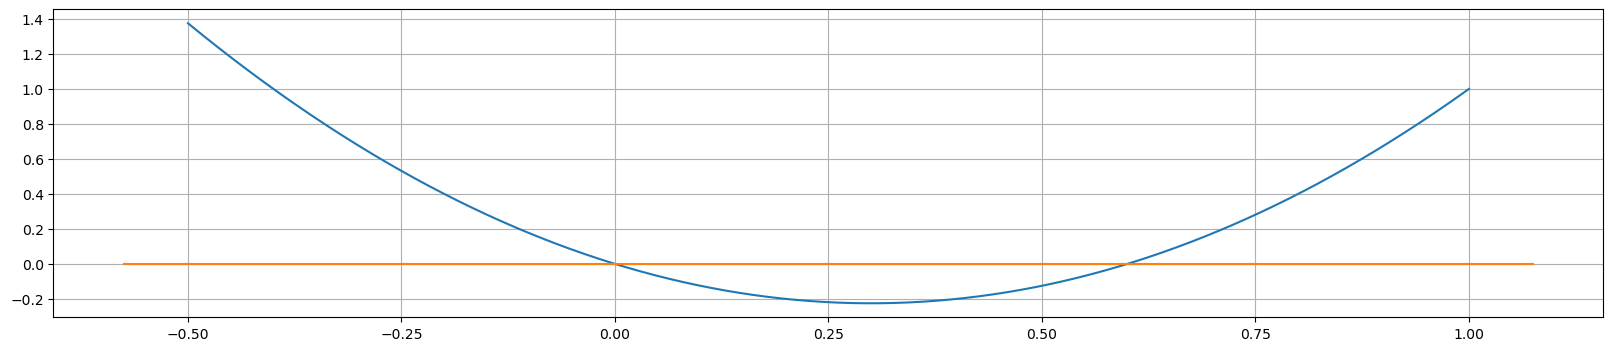

In [3]:
from base import util
from base import logi
import numpy as np
util.plot_univariate_function(f=logi.LogiEq(r=2.5),
                              x=np.linspace(-0.5, 1, 1000),
                              figsize=(20, 4))

* La funzione a due zeri (i.e. il sistema ha due punti di equilibrio)
* Il primo è banale, i.e. $x = 0$, il secondo è intorno a 0.6

**Come possiamo determinare il valore esatto?**

## Metodo della Bisezione

**...Per esempio possiamo utilizzare il metodo della bisezione:**

* Individuiamo due punti $a, b$ per cui $F$ abbia _segno opposto_
* In queste condizioni, _se $F$ è continua_
* ...Allora deve avere uno zero nell'intervallo $[a, b]$

Questo risultato è noto come [teorema di Bolzano](https://en.wikipedia.org/wiki/Intermediate_value_theorem)

**Se $F$ ha uno zero nell'intervallo**

* Allora possiamo considerare il valore intermedio $m = (a + b)/2$
* In base al segno di $m$, possiamo determinare dove sia lo zero
  - I.e. se sia nella metà sx $[a, m]$ o in quella dx $(m, b]$
* ...E ripetere finché non siamo sufficientemente vicini alla soluzione

## Metodo della Bisezione

**Una implementazione del metodo è fornita nel modulo `example.util`**

```python
def bisection(f, a, b, tol=1e-6):
    # Controllo le condizioni di applicabilità
    if f(a) * f(b) >= 0:
        print('f(a) e f(b) devono avere segno opposto')
        return None
    # Individuo uno zero
    while abs(a - b) > tol: # finché la tolleranza desiderata non è raggiunta
        m = 0.5 * (a + b) # determino il punto intermedio
        if f(m) * f(a) >= 0: # se f(m) ed f(a) hanno lo stesso segno
            a = m # ...allora rimpiazzo a con m
        else:
            b = m # ...altrimenti rimpiazzo b
    # Restituisco la soluzione
    return m
```

## Metodo della Bisezione

**Il modulo contiene una versione della funzione**

...Che può disegnare i punti valutati

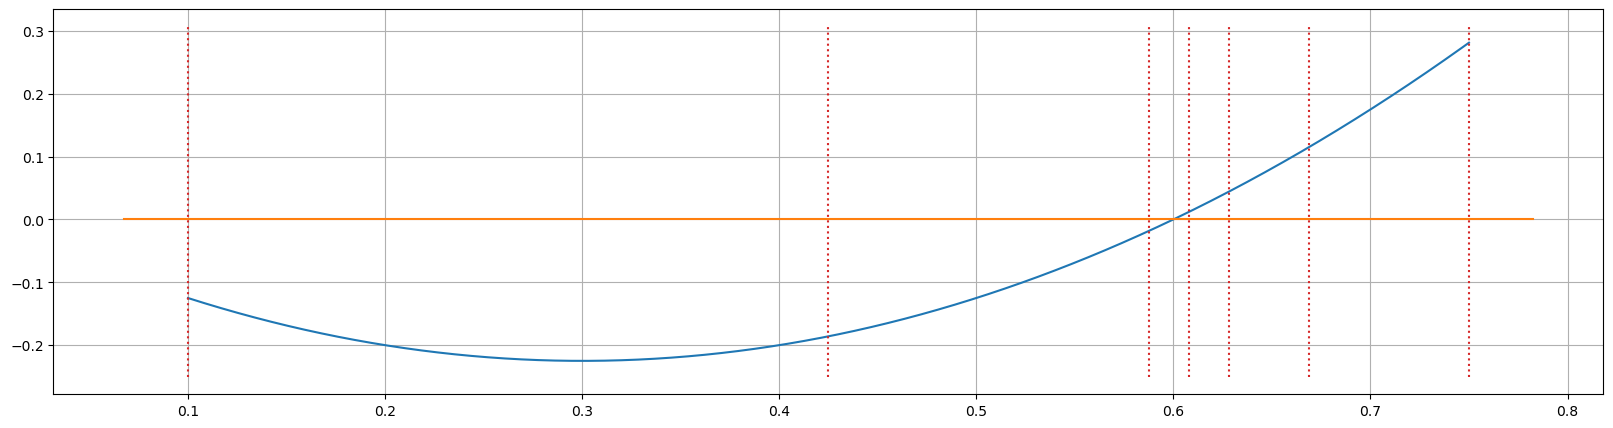

Il secondo zero è circa: 0.6078125000000001


In [4]:
F = logi.LogiEq(r=2.5)
x_sol = util.bisection_with_plot(F, a=0.1, b=0.75, max_it=5, figsize=(20, 5))
print(f'Il secondo zero è circa: {x_sol}')

* Ogni linea rossa corrisponde ad un valore di $x$ valutato

## Oltre il Metodo della Bisezione

**Il metodo della bisezione ha diverse caratteristiche interessanti**

* La sua _convergenza è garantita_ (per funzioni continue)
    * Basta partire da due punti $a$ e $b$ che soddisfino l'assunzione
* _Nessun manipolazione simbolica_ è richiesta
    * Una volta che abbiamo individuato la funzione da azzerare
    * ...Ci basta poterla valutare!

**Il metodo è (relativamente) lento a convergere**

...Ma ne sono state proposte diverse varianti più veloci

* Come al solito, ne troviamo diverse già implementate
* In particolare, queste sono nel modulo `scipy.optimize`

## Migliorarenti del Metodo della Bisezione

**Noi utilizzeremo [il metodo brentq](https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.optimize.brentq.html#scipy.optimize.brentq)**

...Che può essere chiamato esattamente come la funzione `bisect`

* Di seguito vediamo un esempio per la crescita logistica

In [5]:
from scipy.optimize import brentq

F = logi.LogiEq(r=2.5)
x_sol = brentq(F, a=0.1, b=0.75)
print(f'Il secondo zero è in {x_sol}')

Il secondo zero è in 0.6


* Il metodo fornito da `scipy` è di gran lunga migliore del nostro codice
* ...E si raccomanda il suo utilizzo

## Codice Completo

**Di seguito il codice completo dell'esempio:**

In [6]:
import numpy as np
from scipy.optimize import brentq

class LogiEq:
    def __init__(self, r=1, N=1):
        self.r = r
        self.N = N
    
    def __call__(self, x):
        return x - self.r * x * (1 - x/self.N)

F = LogiEq(r=2.5)
x_sol = brentq(F, a=0.1, b=0.75)
print(f'Il secondo zero è in {x_sol}')

Il secondo zero è in 0.6


# Metodo di Newton-Raphson

## Un Esempio

**Consideriamo l'oscillatore di Van der Pol:**

$$
\left(\begin{array}{c}
\dot{x} \\
\dot{y}
\end{array}\right)
=
\left(\begin{array}{c}
y \\
\mu (1 - x^2)y - x
\end{array}\right)
$$

* Si tratta di nuovo di un sistema dinamico
* Ma questa volta è _continuo_

**Supponiamo di volerne determinare di nuovo i punti di equilibrio**

> **Come possiamo procedere?**

## Equilibrio di Sistemi Dinamici Continui

**Un sistema dinamico continuo è descritto da una ODE, i.e.:**

$$
\dot{x} = f(x, t)
$$

* Per definizione, all'equilibrio lo stato $x$ non ha variazioni
* ...Quindi _la sua derivata deve annullarsi_

**Possiamo quindi determinare i punti di equilibrio richiedendo la condizione:**

$$
\dot{x} = f(x, t) = 0
$$

I.e. risolvendo l'equazione non lineare $f(x, t) = 0$

* Il ragionamento applicato è simile a quello per i sistemi discreti
* ...Anche se l'equazione risultante è un po' diversa

## Zeri di Funzioni Vettoriali 

**Proviamo ad applicare il ragionamento al nostro caso:**

L'equazione che caratterizza un equilibrio è:

$$
\left(\begin{array}{c}
y \\
\mu (1 - x^2)y - x
\end{array}\right)
=
\left(\begin{array}{c}
0 \\
0
\end{array}\right)
$$

* È abbastanza facile rendersi conto che c'è un'unica soluzione, i.e. $(0, 0)$
* ...Ma di nuovo useremo questo esempio per introdurre un metodo numerico

**In questo caso il metodo della bisezione non può essere applicato**

...Perché la funzione da azzerare è _multivariata_ e _vettoriale_, i.e. $F: \mathbb{R}^n \to \mathbb{R}^n$

> **Ci occorre un approccio in grado di gestire questa situazione**

## Metodo di Newton-Raphson

**Una possibilità è applicare il [metodo di Newton-Raphson](https://en.wikipedia.org/wiki/Newton%27s_method)**

Data una equazione non lineare (scalare o vettoriale) nella forma:

$$
F(x) = 0
$$

...Il metodo di Newtwon-Raphson:

* Inizia l'esecuzione da una stima iniziale $x_0$ della soluzione
* Approssima la funzione utilizzando l'iperpiano tangente
* Trova uno zero $x_1$ dell'iperpiano tangente
* ...Ripete il processo fino ad una condizione di terminazione

**Il metodo di N-R è alla base di molti algoritmi per zeri di funzioni vettoriali**

## Metodo di Newton-Raphson

**Proviamo a vedere i vari passi nel dettaglio**

...Per semplicità, assumeremo per ora che $F$ sia _univariata e scalare_

* L'obiettivo è risolvere (con $F: \mathbb{R} \to \mathbb{R})$):

$$
F(x) = 0
$$

* Approssimando $F$ utilizzando la _retta_ tangente in $x_k$, otteniamo:

$$
F(x_k) + F^\prime(x_k) (x - x_k) = 0
$$

* ...Che si azzera per:

$$
x = x_k  - \frac{F(x_k)}{F^\prime(x_k)}
$$

## Metodo di Newton-Raphson

**Del codice per la versione univariata del metodo è disponibile in `util`**

```python
def nrm_univariate(f, x0, tol=1e-6, max_it=100):
    x = x0 # Parto dalla stima iniziale
    for k in range(max_it): # Facciamo al più max_it iterazioni
        # Passo principale del metodo di Newton-Raphson
        nx = x - f(x) / num_der(f, x)
        if abs(nx - x) <= tol: # Condizione di terminazione
            break
        x = nx # Rimpiazzo x con il nuovo valore
    return x
```

* Il metodo termina quando $|x_{k+1} - x_k|$ è minore di una data tolleranza
* ...O dopo un numero massimo di iterazioni

## Metodo di Newton-Raphson

**Il modulo contiene anche una versione della funzione**

...Che può disegnare i punti valuati e le tangenti

* Vediamo il metodo in atto per gli equilibri della crescita logistica

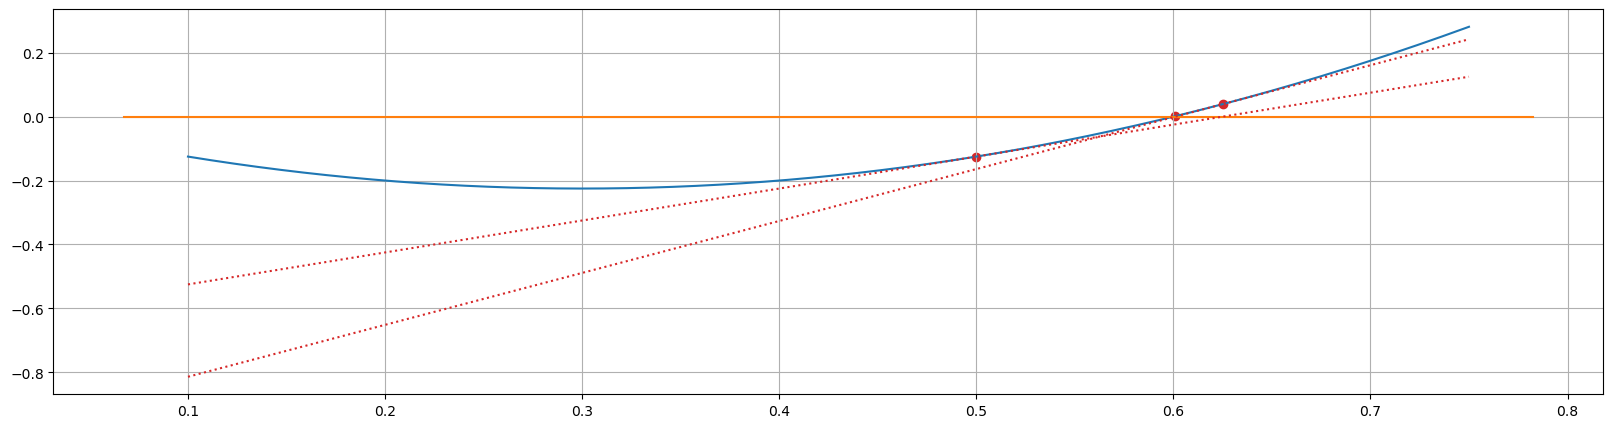

0.6009615386819698

In [7]:
F = LogiEq(r=2.5)
util.nrm_univariate_with_plot(F, x0=0.5, a=0.1, b=0.75, max_it=2, figsize=(20, 5))

## Metodo di Newton-Raphson

**Nel caso $F$ sia _multivariata e vettoriale_**

Il metodo resta identico, con le dovute sostituzioni:

* L'obiettivo è risolvere (con $F: \mathbb{R}^n \to \mathbb{R}^n$):

$$
F(x) = 0
$$

* Approssimando $F$ utilizzando _l'iperpiano_ tangente in $x_k$, otteniamo:

$$
F(x_k) + J_F(x_k) (x - x_k) = 0
$$

* ...Che si azzera per:

$$
x = x_k  - J^{-1}_F(x_k) F(x)
$$

Dove $J_F(x)$ è lo Jacobiano della funzione

## Metodo di Newton Raphson

**Il metodo di Newton-Raphson**

* Converge molto più velocemente di quello della bisezione
    * ...Anche se la differenza sarà trascurabile per i problemi che affronteremo
* Può gestire funzioni vettoriali
    * ...E quindi sistemi di equazioni non lineari
* È applicabile a funzioni _continue e differenziabili_
    * La bisezione richiede solo la continuità
* Il metodo _può non convergere_!
    * E.g. se per un punto la tangente è parallela all'asse delle ascisse!
    * È quindi opportuno controllare il valore di $F(x)$ per la soluzione
* La convergenza _dipende dalla scelta di $x_0$_
    * ...E non sempre è facile trovare una buona stima iniziale

## Funzione `fsolve`

**Come al solito, non utilizzeremo la nostra versione del metodo**

...Ma _una delle sue evoluzioni_, disponibile in scipy.optimize.fsolve

* `fsolve` può essere chiamata in modo simile alla nostra `nrm_univariate`:

In [8]:
from scipy.optimize import fsolve
F = logi.LogiEq(r=2.5)
x_sol = fsolve(F, x0=0.5)
print(f'Il secondo zero è in {x_sol}')
print(f'Il valore della funzione per tale punto è {F(x_sol)}')

Il secondo zero è in [0.6]
Il valore della funzione per tale punto è [-1.99840144e-15]


* Il metodo fornito da `scipy` è di gran lunga migliore del nostro codice
* ...E si raccomanda il suo utilizzo

In [12]:
from base import vdp
from scipy.optimize import fsolve

F = vdp.VdPEq(mu=1)
x_sol = fsolve(F, x0=[0.5, 0.5])
if np.max(np.abs(F(x_sol))) <= 1e-6:
    print(f'Convergenza raggiunta, soluzione: {x_sol}')
else:
    print(f'Convergenza non raggiunta')

Convergenza raggiunta, soluzione: [0. 0.]


## Zeri di Fuzioni Vettoriali

**Vediamo ora come gestire il caso di una funzione vettoriale**

Iniziamo definendo (in `base.vdp`) la funzione di cui intendiamo trovare gli zeri:

```python
class VdPEq:
    def __init__(self, mu=1):
        self.mu = mu
    
    def __call__(self, X):
        x, y = X
        dx = y
        dy = self.mu * (1 - x**2) * y - x
        return np.array([dx, dy])
```

* Nel nostro caso abbiamo usato una classe (con il metodo `__call__`)
* ...In modo da poter cambiare il valore del parametro $\mu$
* La funzione deve ricevere _in ingresso un vettore_ e _restituire un vettore_

## Zeri di Funzioni Vettoriali

**Quindi possiamo chiamare `fsolve` come nel caso precedente:**

In [13]:
from base import vdp
F = vdp.VdPEq(mu=1)
x_sol = fsolve(F, x0=[0.5, 0.5])
print(f'La funzione ha uno zero in in {x_sol}')
print(f'Valore della funzione in {x_sol}: {F(x_sol)}')

La funzione ha uno zero in in [0. 0.]
Valore della funzione in [0. 0.]: [0. 0.]


* La stima di partenza deve essere un vettore
* Come al solito, è opportuno controllare il valore della funzione
* ...Ed accertarsi che sia sufficientemente vicino allo 0